In [1]:
import copy
import datetime as dt
import importlib # needed so that we can reload packages
import matplotlib.pyplot as plt
import os, os.path
import numpy as np
import pandas as pd
import pathlib
import sys
import time
from typing import Union
import warnings
warnings.filterwarnings("ignore")


##  IMPORT SISEPUEDE EXAMPLES AND TRANSFORMERS

from sisepuede.manager.sisepuede_examples import SISEPUEDEExamples
from sisepuede.manager.sisepuede_file_structure import SISEPUEDEFileStructure
import sisepuede.core.support_classes as sc
import sisepuede.transformers as trf
import sisepuede.utilities._plotting as spu
import sisepuede.utilities._toolbox as sf


In [82]:
##  SETUP DIRECTORIES

dir_cur = pathlib.Path(os.getcwd())
dir_data = dir_cur.joinpath("data")
dir_transformations = dir_cur.joinpath("transformations")


##  SETUP FILES

fp_data_base = dir_data.joinpath("sisepuede_inputs_iran.csv")
fp_data_modified = dir_data.joinpath("sisepuede_inputs_iran_modified.csv")


##  SETUP SOME SISEPUEDE STUFF

file_struct = SISEPUEDEFileStructure()

matt = file_struct.model_attributes
regions = sc.Regions(matt)
time_periods = sc.TimePeriods(matt)

In [83]:
##  BUILD BASE INPUTS

df_inputs = pd.read_csv(fp_data_modified)

# pull example data to fill in gaps
examples = SISEPUEDEExamples()
df_inputs_example = examples.input_data_frame

#  Let's try building transformations using this


In [84]:
transformers = trf.transformers.Transformers(
    {},
    df_input = df_inputs,
)


##  Instantiate some transformations CAREFUL NOT TO OVERWRITE EXISTING TRANSFORMATIONS!!

In [157]:
# set an ouput path and instantiate
if not dir_transformations.exists():
    trf.instantiate_default_strategy_directory(
        transformers,
        dir_transformations,
    )


##  --HERE, CUSTOMIZE YOUR TRANSFORMATIONS AND STRATEGIES--
- go to `dir_transformers` and edit config files and `strategy_definitions.csv`
- then, go to next cell

In [86]:
# then, you can load this back in after modifying (play around with it)
transformations = trf.Transformations(
    dir_transformations,
    transformers = transformers,
)
tab = transformations.attribute_transformation.table




In [87]:
#  build the strategies -- will export to path
t0 = time.time()
strategies = trf.Strategies(
    transformations,
    export_path = "transformations",
    prebuild = True,
)

t_elapse = sf.get_time_elapsed(t0)
print(f"Strategies defined at {strategies.transformations.dir_init} initialized in {t_elapse} seconds")



Strategies defined at /Users/usuario/git/sisepuede_region_nbs/iran/transformations initialized in 2.46 seconds


In [59]:
strategies.attribute_table

,strategy_id,strategy_code,strategy,description,transformation_specification,baseline_strategy_id
0,0,BASE,Strategy TX:BASE,NaN,TX:BASE,1
1,1000,AGRC:DEC_CH4_RICE,Singleton - Default Value - AGRC: Improve rice...,NaN,TX:AGRC:DEC_CH4_RICE,0
2,1001,AGRC:DEC_EXPORTS,Singleton - Default Value - AGRC: Decrease Exp...,NaN,TX:AGRC:DEC_EXPORTS,0
3,1002,AGRC:DEC_LOSSES_SUPPLY_CHAIN,Singleton - Default Value - AGRC: Reduce suppl...,NaN,TX:AGRC:DEC_LOSSES_SUPPLY_CHAIN,0
4,1003,AGRC:INC_CONSERVATION_AGRICULTURE,Singleton - Default Value - AGRC: Expand conse...,NaN,TX:AGRC:INC_CONSERVATION_AGRICULTURE,0
...,...,...,...,...,...,...
67,6001,PFLO:INC_IND_CCS,Singleton - Default Value - PFLO: Industrial c...,NaN,TX:PFLO:INC_IND_CCS,0
68,6002,PFLO:ALL,All Actions,All actions (unique by transformer),TX:AGRC:DEC_CH4_RICE|TX:AGRC:DEC_EXPORTS|TX:AG...,0
69,6003,PFLO:CONSTRAINED,Constrained Climate Action,NaN,TX:AGRC:DEC_CH4_RICE_LOW|TX:AGRC:DEC_LOSSES_SU...,0
70,6004,PFLO:TECHNOLOGICAL_ADOPTION,Technology Adoption Scenario,NaN,TX:AGRC:DEC_CH4_RICE_LOW|TX:AGRC:DEC_LOSSES_SU...,0


##  Build our templates
- let's use the default variable groupings for LHS

In [88]:
df_vargroups = examples("variable_trajectory_group_specification")

strategies.build_strategies_to_templates(
    df_trajgroup = df_vargroups,
    include_simplex_group_as_trajgroup = True,
    strategies = [0, 6003, 6004, 6005],
)



0

# Finally, load SISEPUEDE so that we can run it

In [89]:
import sisepuede as si

ssp = si.SISEPUEDE(
    "calibrated",
    db_type = "csv",
    #id_str = "sisepuede_run_2024-11-04T09:23:26.721580",
    initialize_as_dummy = False, # no connection to Julia is initialized if set to True
    regions = ["iran"],
    strategies = strategies,
    try_exogenous_xl_types_in_variable_specification = True,
)

2024-11-11 03:57:34,876 - INFO - Successfully initialized SISEPUEDEFileStructure.
2024-11-11 03:57:34,876 - INFO - Successfully initialized SISEPUEDEFileStructure.
2024-11-11 03:57:34,877 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2024-11-11 03:57:34,877 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2024-11-11 03:57:34,878 - INFO - 	Setting export engine to 'csv'.
2024-11-11 03:57:34,878 - INFO - 	Setting export engine to 'csv'.
2024-11-11 03:57:34,878 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2024-11-11 03:57:34,878 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2024-11-11 03:57:34,879 - INFO - Successfully instantiated table ANALYSIS_METADATA
2024-11-11 03:57:34,879 - INFO - Successfully

In [90]:
dict_scens = {
    ssp.key_design: [0],
    ssp.key_future: [0],
    ssp.key_strategy: [0, 6003, 6004, 6005],
}

ssp.project_scenarios(
    dict_scens,
    save_inputs = True,
)

2024-11-11 03:57:54,335 - INFO - 
***	STARTING REGION iran	***

2024-11-11 03:57:54,335 - INFO - 
***	STARTING REGION iran	***

2024-11-11 03:57:55,839 - INFO - Trying run primary_id = 0 in region iran
2024-11-11 03:57:55,839 - INFO - Trying run primary_id = 0 in region iran
2024-11-11 03:57:55,840 - INFO - Running AFOLU model
2024-11-11 03:57:55,840 - INFO - Running AFOLU model
2024-11-11 03:57:55,929 - INFO - AFOLU model run successfully completed
2024-11-11 03:57:55,929 - INFO - AFOLU model run successfully completed
2024-11-11 03:57:55,930 - INFO - Running CircularEconomy model
2024-11-11 03:57:55,930 - INFO - Running CircularEconomy model
2024-11-11 03:57:55,955 - INFO - CircularEconomy model run successfully completed
2024-11-11 03:57:55,955 - INFO - CircularEconomy model run successfully completed
2024-11-11 03:57:55,956 - INFO - Running IPPU model
2024-11-11 03:57:55,956 - INFO - Running IPPU model
2024-11-11 03:57:55,998 - INFO - IPPU model run successfully completed
2024-11-1

2024-11-Nov 03:57:56.613 Opened SQLite database at /opt/miniconda3/envs/amber_is_your_energy/lib/python3.11/site-packages/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2024-11-Nov 03:57:56.830 Added NEMO structure to SQLite database at /opt/miniconda3/envs/amber_is_your_energy/lib/python3.11/site-packages/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2024-11-Nov 03:58:04.218 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.
2024-11-Nov 03:58:45.718 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2024-11-11 03:58:45,810 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-11-11 03:58:45,810 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-11-11 03:58:45,817 - INFO - EnergyProduction model run successfully completed
2024-11-11 03:58:45,817 - INFO - EnergyProduction model run successfully completed
2024-11-11 03:58:45,817 - INFO - Running Energy (Fugitive Emissions)
2024-11-11 03:58:45,817 - INFO - Running Energy (Fugitive Emissions)
2024-11-11 03:58:45,841 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-11-11 03:58:45,841 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-11-11 03:58:45,842 - INFO - Appending Socioeconomic outputs
2024-11-11 03:58:45,842 - INFO - Appending Socioec

2024-11-Nov 03:58:46.650 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2024-11-11 03:59:19,737 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-11-11 03:59:19,737 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-11-11 03:59:19,743 - INFO - EnergyProduction model run successfully completed
2024-11-11 03:59:19,743 - INFO - EnergyProduction model run successfully completed
2024-11-11 03:59:19,744 - INFO - Running Energy (Fugitive Emissions)
2024-11-11 03:59:19,744 - INFO - Running Energy (Fugitive Emissions)
2024-11-11 03:59:19,766 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-11-11 03:59:19,766 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-11-11 03:59:19,767 - INFO - Appending Socioeconomic outputs
2024-11-11 03:59:19,767 - INFO - Appending Socioec

2024-11-Nov 03:59:19.656 Finished modeling scenario.


2024-11-11 03:59:19,870 - INFO - AFOLU model run successfully completed
2024-11-11 03:59:19,870 - INFO - AFOLU model run successfully completed
2024-11-11 03:59:19,871 - INFO - Running CircularEconomy model
2024-11-11 03:59:19,871 - INFO - Running CircularEconomy model
2024-11-11 03:59:19,897 - INFO - CircularEconomy model run successfully completed
2024-11-11 03:59:19,897 - INFO - CircularEconomy model run successfully completed
2024-11-11 03:59:19,898 - INFO - Running IPPU model
2024-11-11 03:59:19,898 - INFO - Running IPPU model
2024-11-11 03:59:19,938 - INFO - IPPU model run successfully completed
2024-11-11 03:59:19,938 - INFO - IPPU model run successfully completed
2024-11-11 03:59:19,938 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2024-11-11 03:59:19,938 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2024-11-11 03:59:19,949 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_eff

2024-11-Nov 03:59:20.559 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2024-11-11 04:00:17,137 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-11-11 04:00:17,137 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-11-11 04:00:17,145 - INFO - EnergyProduction model run successfully completed
2024-11-11 04:00:17,145 - INFO - EnergyProduction model run successfully completed
2024-11-11 04:00:17,145 - INFO - Running Energy (Fugitive Emissions)
2024-11-11 04:00:17,145 - INFO - Running Energy (Fugitive Emissions)
2024-11-11 04:00:17,166 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-11-11 04:00:17,166 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-11-11 04:00:17,167 - INFO - Appending Socioeconomic outputs
2024-11-11 04:00:17,167 - INFO - Appending Socioec

2024-11-Nov 04:00:17.058 Finished modeling scenario.


2024-11-11 04:00:17,267 - INFO - AFOLU model run successfully completed
2024-11-11 04:00:17,267 - INFO - AFOLU model run successfully completed
2024-11-11 04:00:17,268 - INFO - Running CircularEconomy model
2024-11-11 04:00:17,268 - INFO - Running CircularEconomy model
2024-11-11 04:00:17,292 - INFO - CircularEconomy model run successfully completed
2024-11-11 04:00:17,292 - INFO - CircularEconomy model run successfully completed
2024-11-11 04:00:17,293 - INFO - Running IPPU model
2024-11-11 04:00:17,293 - INFO - Running IPPU model
2024-11-11 04:00:17,330 - INFO - IPPU model run successfully completed
2024-11-11 04:00:17,330 - INFO - IPPU model run successfully completed
2024-11-11 04:00:17,331 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2024-11-11 04:00:17,331 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2024-11-11 04:00:17,341 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_eff

2024-11-Nov 04:00:17.942 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2024-11-11 04:01:05,600 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-11-11 04:01:05,600 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-11-11 04:01:05,607 - INFO - EnergyProduction model run successfully completed
2024-11-11 04:01:05,607 - INFO - EnergyProduction model run successfully completed
2024-11-11 04:01:05,607 - INFO - Running Energy (Fugitive Emissions)
2024-11-11 04:01:05,607 - INFO - Running Energy (Fugitive Emissions)
2024-11-11 04:01:05,628 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-11-11 04:01:05,628 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-11-11 04:01:05,629 - INFO - Appending Socioeconomic outputs
2024-11-11 04:01:05,629 - INFO - Appending Socioec

2024-11-Nov 04:01:05.519 Finished modeling scenario.


2024-11-11 04:01:05,731 - INFO - Table MODEL_OUTPUT successfully written to /opt/miniconda3/envs/amber_is_your_energy/lib/python3.11/site-packages/sisepuede/out/sisepuede_run_2024-11-11T03;57;34.539378/sisepuede_run_2024-11-11T03;57;34.539378_output_database/MODEL_OUTPUT.csv.
2024-11-11 04:01:05,731 - INFO - Table MODEL_OUTPUT successfully written to /opt/miniconda3/envs/amber_is_your_energy/lib/python3.11/site-packages/sisepuede/out/sisepuede_run_2024-11-11T03;57;34.539378/sisepuede_run_2024-11-11T03;57;34.539378_output_database/MODEL_OUTPUT.csv.
2024-11-11 04:01:05,733 - INFO - Table ATTRIBUTE_PRIMARY successfully written to /opt/miniconda3/envs/amber_is_your_energy/lib/python3.11/site-packages/sisepuede/out/sisepuede_run_2024-11-11T03;57;34.539378/sisepuede_run_2024-11-11T03;57;34.539378_output_database/ATTRIBUTE_PRIMARY.csv.
2024-11-11 04:01:05,733 - INFO - Table ATTRIBUTE_PRIMARY successfully written to /opt/miniconda3/envs/amber_is_your_energy/lib/python3.11/site-packages/sisepue

{'iran': [0, 69069, 70070, 71071]}

In [173]:
# df_run = ssp.generate_scenario_database_from_primary_key(0)
# df_run = df_run.get("iran")
# df_run.to_csv("/Users/usuario/Desktop/iran_baselines_temp.csv", encoding = "UTF-8", index = None, )

In [93]:
df_out = ssp.read_output(None)
df_in = ssp.read_input(None)

# option to pass `df_out` back to data_modifications
- do this if the outputs are needed to rescale input demand values to match IEA data

In [61]:
(
    df_out
    .to_csv(
        dir_data.joinpath("sisepuede_outputs_iran_preiea.csv"),
        index = None,
        encoding = "UTF-8",
    )
)

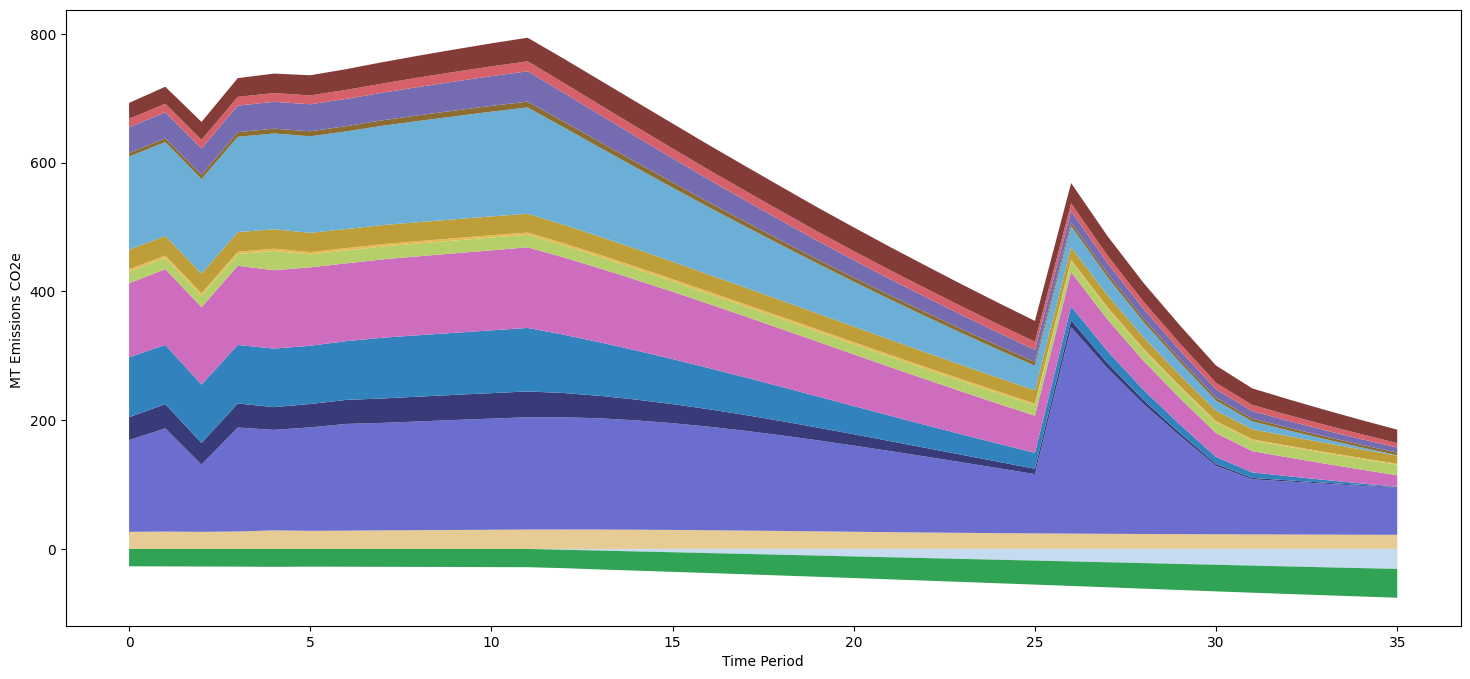

In [128]:

fig, ax = plt.subplots(figsize = (18, 8))
ax.set_xlabel("Time Period")
ax.set_ylabel("MT Emissions CO2e ")

df_plot = df_out[
    df_out[ssp.key_primary].isin([71071])
]

df_in_plot = df_in[
    df_in[ssp.key_primary].isin([71071])
]


fields = matt.get_all_subsector_emission_total_fields()#[x for x in df_out.columns if (x.startswith("emission_co2e_subsector_total"))]
dict_format = dict(
    (k, {"color": v}) for (k, v) in
    matt.get_subsector_color_map().items()
)

fig, ax = spu.plot_stack(
    df_plot,
    fields,
    dict_formatting = dict_format,
    field_x = "time_period",
    figtuple = (fig, ax),
)



In [143]:
series = df_plot[[x for x in df_plot.columns if ("emission" in x) and ("entc" in x)]].iloc[25]
series.to_dict()

{'emission_co2e_ch4_entc_fuel_mining_and_extraction_me_coal': 3.401494533126741e-05,
 'emission_co2e_ch4_entc_fuel_mining_and_extraction_me_crude': 0.0270441065415066,
 'emission_co2e_ch4_entc_fuel_mining_and_extraction_me_natural_gas': 0.0099122615797226,
 'emission_co2e_ch4_entc_generation_for_ccsq': 0.0016153490450524,
 'emission_co2e_ch4_entc_generation_for_entc': 0.0171273755496534,
 'emission_co2e_ch4_entc_generation_for_export': 0.0063457283513554,
 'emission_co2e_ch4_entc_generation_for_inen': 0.011576773440444,
 'emission_co2e_ch4_entc_generation_for_scoe': 0.0286236963177644,
 'emission_co2e_ch4_entc_generation_for_trns': 0.0015263303292735,
 'emission_co2e_ch4_entc_generation_pp_biogas': 0.0002178498408767,
 'emission_co2e_ch4_entc_generation_pp_biomass': 0.0,
 'emission_co2e_ch4_entc_generation_pp_coal': 3.227585860106939e-05,
 'emission_co2e_ch4_entc_generation_pp_coal_ccs': 0.0,
 'emission_co2e_ch4_entc_generation_pp_gas': 0.0267738007024991,
 'emission_co2e_ch4_entc_gene

In [161]:
#df_in_plot[[x for x in df_in_plot.columns if ("enfu" in x) and ("export" in x)]]
fields = [x for x in df_plot.columns if ("enfu" in x) and ("export" in x)]
df_plot[fields].iloc[25:28]


,exports_enfu_unused_fuel_biogas_pj,exports_enfu_unused_fuel_waste_pj,exportsadj_enfu_fuel_ammonia,exportsadj_enfu_fuel_coal,exportsadj_enfu_fuel_crude,exportsadj_enfu_fuel_diesel,exportsadj_enfu_fuel_electricity,exportsadj_enfu_fuel_gasoline,exportsadj_enfu_fuel_hydrocarbon_gas_liquids,exportsadj_enfu_fuel_hydrogen,exportsadj_enfu_fuel_kerosene,exportsadj_enfu_fuel_natural_gas,exportsadj_enfu_fuel_oil
133,442.855291,1.526903,0.0,7.078550,5157.52267,283.325382,179.237721,1097.251417,167.024038,3.174800,192.478375,339.618531,77.564193
134,491.305594,1.411496,0.0,6.499485,5157.52267,6228.105531,176.927739,12162.752884,1101.939657,3.217693,2190.860251,337.922182,77.540117
135,542.578410,1.298582,0.0,5.968370,5157.52267,4928.816781,174.130385,9703.856760,881.725258,3.246953,1746.439083,336.341499,77.517221


In [187]:
df_iter = df_plot.drop(columns = ["primary_id", "region", "time_period"])
for x in df_iter.columns:

    err = np.abs(1 - df_iter[x].iloc[26]/df_iter[x].iloc[25])
    if err > 0.8:
        print(x)



demand_agrc_bevs_and_spices_tonne
demand_agrc_fibers_tonne
demand_agrc_fruits_tonne
demand_agrc_nuts_tonne
demand_agrc_other_annual_tonne
demand_agrc_other_woody_perennial_tonne
demand_agrc_sugar_cane_tonne
emission_co2e_ch4_entc_fuel_mining_and_extraction_me_crude
emission_co2e_ch4_entc_generation_for_entc
emission_co2e_ch4_entc_processing_and_refinement_fp_petroleum_refinement
emission_co2e_ch4_fgtv_fuel_oil
emission_co2e_ch4_trww_treated_septic_treatment
emission_co2e_co2_entc_fuel_mining_and_extraction_me_crude
emission_co2e_co2_entc_generation_for_entc
emission_co2e_co2_entc_processing_and_refinement_fp_petroleum_refinement
emission_co2e_co2_fgtv_fuel_oil
emission_co2e_n2o_entc_fuel_mining_and_extraction_me_crude
emission_co2e_n2o_entc_generation_for_entc
emission_co2e_n2o_entc_processing_and_refinement_fp_petroleum_refinement
emission_co2e_n2o_fgtv_fuel_oil
emission_co2e_subsector_total_entc
emission_nongas_fgtv_kt_nmvoc_fuel_oil
energy_demand_enfu_subsector_total_pj_entc_fuel_cr

In [203]:
df_in_plot["frac_enfu_fuel_demand_imported_pj_fuel_gasoline"]

108    0.031667
109    0.047786
110    0.031667
111    0.031667
112    0.031667
113    0.031667
114    0.031667
115    0.031667
116    0.031667
117    0.031667
118    0.031667
119    0.031667
120    0.031667
121    0.031667
122    0.031667
123    0.031667
124    0.031667
125    0.031667
126    0.031667
127    0.031667
128    0.031667
129    0.031667
130    0.031667
131    0.031667
132    0.031667
133    0.031667
134    0.031667
135    0.031667
136    0.031667
137    0.031667
138    0.031667
139    0.031667
140    0.031667
141    0.031667
142    0.031667
143    0.031667
Name: frac_enfu_fuel_demand_imported_pj_fuel_gasoline, dtype: float64

<Axes: >

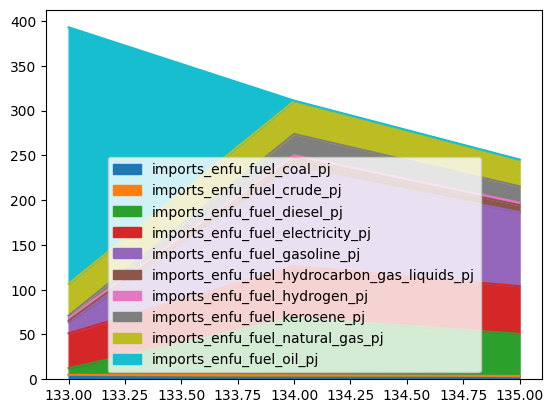

In [234]:
df_plot[[x for x in df_plot.columns if x.startswith("imports_enfu_") and ("ammonia" not in x)]].iloc[25:28].plot.area()

In [235]:
mp = ssp.models.model_enerprod
mp.get_enfu_cats_with_high_dummy_tech_costs(imports_only = True, )
dict_tech_info = mp.get_tech_info_dict()
dict_fuels_to_dummy_techs = dict_tech_info.get("dict_fuels_to_dummy_techs")



In [219]:
import sqlalchemy
import sisepuede.utilities._sql as squ

fp = ssp.file_struct.fp_sqlite_tmp_nemomod_intermediate
engine = sqlalchemy.create_engine(f"sqlite:///{fp}")
squ.get_table_names(engine)

['AccumulatedAnnualDemand',
 'AnnualEmissionLimit',
 'AnnualExogenousEmission',
 'AvailabilityFactor',
 'CapacityOfOneTechnologyUnit',
 'CapacityToActivityUnit',
 'CapitalCost',
 'CapitalCostStorage',
 'DefaultParams',
 'DepreciationMethod',
 'DiscountRate',
 'EMISSION',
 'EmissionActivityRatio',
 'EmissionsPenalty',
 'FUEL',
 'FixedCost',
 'InputActivityRatio',
 'InterestRateStorage',
 'InterestRateTechnology',
 'LTsGroup',
 'MODE_OF_OPERATION',
 'MinShareProduction',
 'MinStorageCharge',
 'MinimumUtilization',
 'ModelPeriodEmissionLimit',
 'ModelPeriodExogenousEmission',
 'NODE',
 'NodalDistributionDemand',
 'NodalDistributionStorageCapacity',
 'NodalDistributionTechnologyCapacity',
 'OperationalLife',
 'OperationalLifeStorage',
 'OutputActivityRatio',
 'REGION',
 'REGIONGROUP',
 'REMinProductionTarget',
 'REMinProductionTargetRG',
 'RETagTechnology',
 'RRGroup',
 'RampRate',
 'RampingReset',
 'ReserveMargin',
 'ReserveMarginTagFuel',
 'ReserveMarginTagTechnology',
 'ResidualCapacity

In [338]:
?sm.SISEPUEDEModels

Init signature:
sm.SISEPUEDEModels(
    model_attributes: sisepuede.core.model_attributes.ModelAttributes,
    allow_electricity_run: bool = True,
    fp_julia: Optional[str] = None,
    fp_nemomod_reference_files: Optional[str] = None,
    fp_nemomod_temp_sqlite_db: Optional[str] = None,
    initialize_julia: bool = True,
    logger: Optional[logging.Logger] = None,
)
Docstring:     
Instantiate models for SISEPUEDE.

Initialization Arguments
------------------------
- model_attributes: ModelAttributes object used to manage variables and
        coordination

Optional Arguments
------------------
- allow_electricity_run: allow the electricity model to run (high-runtime
        model)
        * Generally should be left to True
- fp_nemomod_reference_files: directory housing reference files called by
        NemoMod when running electricity model
        * REQUIRED TO RUN ELECTRICITY MODEL
- fp_nemomod_temp_sqlite_db: optional file path to use for SQLite database
        used in Julia N

In [352]:
strat6005 = strategies.get_strategy(6005)
df_run = strat6005()

In [344]:
import sisepuede.manager.sisepuede_models as sm

models = sm.SISEPUEDEModels(
    ssp.model_attributes,
    fp_julia = file_struct.dir_jl,
    fp_nemomod_reference_files = file_struct.dir_ref_nemo,
)

In [353]:
df_out = models.project(df_run)

2024-12-Nov 00:12:32.726 Opened SQLite database at /Users/usuario/git/sisepuede_region_nbs/iran/tmpfandus2u.sqlite.
2024-12-Nov 00:12:32.735 Added NEMO structure to SQLite database at /Users/usuario/git/sisepuede_region_nbs/iran/tmpfandus2u.sqlite.
2024-12-Nov 00:12:33.285 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.
2024-12-Nov 00:13:03.096 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112


In [377]:
engine2 = sqlalchemy.create_engine(f"sqlite:///{models.fp_nemomod_temp_sqlite_db}")
engine2

Engine(sqlite:////Users/usuario/git/sisepuede_region_nbs/iran/tmpfandus2u.sqlite)

In [378]:
df_out["emission_co2e_subsector_total_entc"]

0     142.497139
1     160.194954
2     104.448034
3     161.495073
4     156.042468
5     160.673248
6     165.702258
7     166.900653
8     168.886887
9     170.776214
10    172.630724
11    174.490622
12    174.430746
13    172.744188
14    169.779645
15    165.771635
16    160.786726
17    154.988772
18    148.498669
19    141.424764
20    133.865700
21    125.902261
22    117.743583
23    109.348074
24    100.767887
25     92.058303
26    320.542329
27    257.156507
28    201.745232
29    152.729130
30    106.330225
31     85.599215
32     82.286206
33     79.111299
34     76.068705
35     73.153583
Name: emission_co2e_subsector_total_entc, dtype: float64

In [373]:
df = squ.sql_table_to_df(engine2, "VariableCost")
df[
    df["t"].isin(["supply_fuel_oil"])
]

,id,r,t,m,y,val
38,39,costa_rica,supply_fuel_oil,generate,1000,177840.0
82,83,costa_rica,supply_fuel_oil,generate,1001,177840.0
126,127,costa_rica,supply_fuel_oil,generate,1002,177840.0
170,171,costa_rica,supply_fuel_oil,generate,1003,177840.0
214,215,costa_rica,supply_fuel_oil,generate,1004,177840.0
258,259,costa_rica,supply_fuel_oil,generate,1005,177840.0
302,303,costa_rica,supply_fuel_oil,generate,1006,177840.0
346,347,costa_rica,supply_fuel_oil,generate,1007,177840.0
390,391,costa_rica,supply_fuel_oil,generate,1008,177840.0
434,435,costa_rica,supply_fuel_oil,generate,1009,177840.0


In [362]:
df = squ.sql_table_to_df(engine, "MinShareProduction")#"vproductionbytechnologyannual")
#df = squ.sql_table_to_df(engine, "vproductionbytechnologyannual")
#df[df["f"].isin(["fuel_hydrocarbon_gas_liquids"])]
(
    df[
        df["y"].isin(["1024", "1025", "1026", "1027", "1028"])
        & df["f"].isin(["fuel_hydrocarbon_gas_liquids"])
        #& df["t"].isin(["supply_fuel_oil"])
    ]
    .sort_values(by = ["y"])
)


df2 = squ.sql_table_to_df(engine2, "vdiscountedoperatingcost")#"vproductionbytechnologyannual")
#df[df["t"].isin(["supply_fuel_oil"])]

(
    df2[
        df2["t"].isin(
            [
                "supply_fuel_gasoline",
                "supply_fuel_diesel",
                "supply_fuel_kerosene",
                "supply_fuel_hydrocarbon_gas_liquids",
                "supply_fuel_oil"
            ]
        )
    ]
    .get(["y", "val"])
    .groupby(["y"])
    .sum()
)

,val
y,
1000,1.026134e+08
1001,1.029844e+08
1002,6.857585e+07
1003,9.534403e+07
1004,1.267386e+08
1005,1.253743e+08
1006,1.272909e+08
1007,1.262271e+08
1008,1.276971e+08


In [333]:
df[df["t"].isin(["supply_fuel_diesel"])]

,r,t,y,val,solvedtm
9,iran,supply_fuel_diesel,1000,3.549854e+06,2024-11-11 04:01:05.401
25,iran,supply_fuel_diesel,1001,5.997592e+06,2024-11-11 04:01:05.401
43,iran,supply_fuel_diesel,1002,3.987069e+06,2024-11-11 04:01:05.401
61,iran,supply_fuel_diesel,1003,4.106783e+06,2024-11-11 04:01:05.401
79,iran,supply_fuel_diesel,1004,4.070337e+06,2024-11-11 04:01:05.401
97,iran,supply_fuel_diesel,1005,4.110702e+06,2024-11-11 04:01:05.401
115,iran,supply_fuel_diesel,1006,4.148467e+06,2024-11-11 04:01:05.401
133,iran,supply_fuel_diesel,1007,4.234256e+06,2024-11-11 04:01:05.401
151,iran,supply_fuel_diesel,1008,4.314389e+06,2024-11-11 04:01:05.401
169,iran,supply_fuel_diesel,1009,4.389015e+06,2024-11-11 04:01:05.401


In [286]:
df = squ.sql_table_to_df(engine, "SpecifiedAnnualDemand")#"MinShareProduction")
#df[df["f"].isin(["fuel_kerosene"])]
#df[]
df[df["f"].isin(["fuel_oil"])]


,id,r,f,y,val
324,325,iran,fuel_oil,1000,129.904676
325,326,iran,fuel_oil,1001,160.659056
326,327,iran,fuel_oil,1002,129.213705
327,328,iran,fuel_oil,1003,207.314709
328,329,iran,fuel_oil,1004,207.931308
329,330,iran,fuel_oil,1005,204.499484
330,331,iran,fuel_oil,1006,206.080790
331,332,iran,fuel_oil,1007,226.069345
332,333,iran,fuel_oil,1008,226.836876
333,334,iran,fuel_oil,1009,227.596002


In [287]:
df = squ.sql_table_to_df(engine, "vusebytechnologyannual")#"MinShareProduction")
#df[df["f"].isin(["fuel_kerosene"])]
#df[]
(
    df[
        df["y"].isin(["1024", "1025", "1026", "1027", "1028"])
        #& df["f"].isin(["fuel_gasoline"])
        & df["t"].isin(["supply_fuel_oil"])
    ]
    .sort_values(by = ["y"])
)


,r,t,f,y,val,solvedtm
892,iran,supply_fuel_oil,fuel_QUANTITY_PRODUCED,1024,325.810300,2024-11-11 04:01:05.401
897,iran,supply_fuel_oil,fuel_QUANTITY_PRODUCED,1025,286.255690,2024-11-11 04:01:05.401
895,iran,supply_fuel_oil,fuel_QUANTITY_PRODUCED,1026,0.550613,2024-11-11 04:01:05.401
882,iran,supply_fuel_oil,fuel_QUANTITY_PRODUCED,1027,0.400987,2024-11-11 04:01:05.401
877,iran,supply_fuel_oil,fuel_QUANTITY_PRODUCED,1028,0.281235,2024-11-11 04:01:05.401


In [290]:
df = squ.sql_table_to_df(engine, "vproductionbytechnologyannual")#"MinShareProduction")
#df[df["f"].isin(["fuel_kerosene"])]
#df[]
(
    df[
        df["y"].isin(["1024", "1025", "1026", "1027", "1028"])
        #& df["f"].isin(["fuel_gasoline"])
        & df["f"].isin(["fuel_oil"])
    ]
    .sort_values(by = ["y"])
)


,r,t,f,y,val,solvedtm
688,iran,supply_fuel_oil,fuel_oil,1024,325.810300,2024-11-11 04:01:05.401
1130,iran,fp_petroleum_refinement,fuel_oil,1024,39.582240,2024-11-11 04:01:05.401
693,iran,supply_fuel_oil,fuel_oil,1025,286.255690,2024-11-11 04:01:05.401
1135,iran,fp_petroleum_refinement,fuel_oil,1025,38.143845,2024-11-11 04:01:05.401
691,iran,supply_fuel_oil,fuel_oil,1026,0.550613,2024-11-11 04:01:05.401
1133,iran,fp_petroleum_refinement,fuel_oil,1026,360.956446,2024-11-11 04:01:05.401
678,iran,supply_fuel_oil,fuel_oil,1027,0.400987,2024-11-11 04:01:05.401
1120,iran,fp_petroleum_refinement,fuel_oil,1027,288.820888,2024-11-11 04:01:05.401
673,iran,supply_fuel_oil,fuel_oil,1028,0.281235,2024-11-11 04:01:05.401
1115,iran,fp_petroleum_refinement,fuel_oil,1028,225.752896,2024-11-11 04:01:05.401


In [238]:
df[df["y"].isin(["1027"])]

,id,r,t,f,y,val
27,28,iran,fp_hydrogen_electrolysis,fuel_hydrogen,1027,0.617572
63,64,iran,pp_coal,fuel_electricity,1027,0.000350
99,100,iran,pp_gas,fuel_electricity,1027,0.145061
135,136,iran,pp_hydropower,fuel_electricity,1027,0.000000
171,172,iran,pp_nuclear,fuel_electricity,1027,0.000000
207,208,iran,pp_oil,fuel_electricity,1027,0.024489
243,244,iran,pp_solar,fuel_electricity,1027,0.002169
279,280,iran,pp_wind,fuel_electricity,1027,0.002397
315,316,iran,supply_fuel_ammonia,fuel_ammonia,1027,0.000000
351,352,iran,supply_fuel_coal,fuel_coal,1027,0.129166


<Axes: >

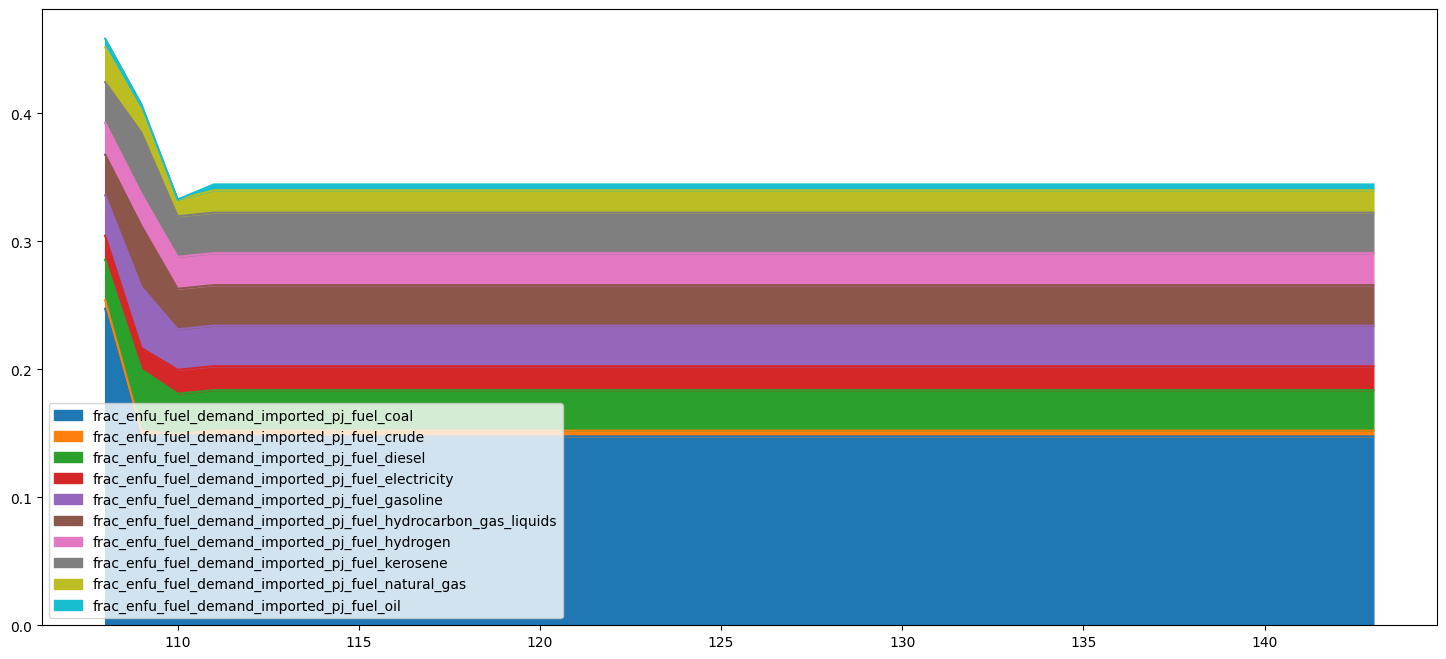

In [205]:
df = df_in_plot
fields = [x for x in df.columns if ("enfu" in x) and ("import" in x)]
fields = [x for x in fields if df[x].max() > 0.00001]

fig, ax = plt.subplots(figsize = (18, 8))
df[fields].plot.area(ax = ax)

In [155]:
#df_in_plot[[x for x in df_in_plot.columns if ("enfu" in x) and ("export" in x)]]
fields = [x for x in df_in_plot.columns if ("trns" in x) and ("kerosene" in x)]
df_in_plot[fields].iloc[25:28]


,ef_trns_mobile_combustion_aviation_kg_ch4_per_tj_kerosene,ef_trns_mobile_combustion_aviation_kg_n2o_per_tj_kerosene,frac_trns_fuelmix_aviation_kerosene,fuelefficiency_trns_aviation_kerosene_km_per_litre
133,0.5,2.0,1.0,0.099687
134,0.5,2.0,1.0,0.100594
135,0.5,2.0,1.0,0.101500


In [121]:
series = df_plot[[x for x in df_plot.columns if ("emission" in x) and ("entc" in x)]].iloc[26]
dict_26 = series.to_dict()

df_26 = (
    pd.DataFrame(dict((k, [v]) for k, v in dict_26.items()))
    .transpose()
    .reset_index()
    .sort_values(by = [0], ascending = False, )
)
df_26.to_csv("/Users/usuario/Desktop/temp.csv", index = None, encoding = "UTF-8",)

# Export Wide File

In [206]:
df_out = ssp.read_output(None)
df_in = ssp.read_input(None)


all_primaries = sorted(list(df_out[ssp.key_primary].unique()))

# build if unable to simply read the data frame
if df_in is None:
    df_in = []
     
    for region in ssp.regions:
        for primary in all_primaries: 
            df_in_filt = ssp.generate_scenario_database_from_primary_key(primary)
            df_in.append(df_in_filt.get(region))
    
    df_in = pd.concat(df_in, axis = 0).reset_index(drop = True)




df_export = pd.merge(
    df_out,
    df_in,
    how = "left",
)





# check output directory 
dir_pkg = os.path.join(
    ssp.file_struct.dir_out, 
    f"sisepuede_summary_results_run_{ssp.id_fs_safe}"
)
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None


for tab in ["ATTRIBUTE_STRATEGY"]:
    ssp.database.db.read_table(tab).to_csv(
        os.path.join(dir_pkg, f"{tab}.csv"),
        index = None,
        encoding = "UTF-8"
    )


df_primary = (
    ssp
    .odpt_primary
    .get_indexing_dataframe(
        sorted(list(df_out[ssp.key_primary].unique()))
    )
)
    
df_primary.to_csv(
    os.path.join(dir_pkg, f"ATTRIBUTE_PRIMARY.csv"),
    index = None,
    encoding = "UTF-8"
)

df_export.to_csv(
    os.path.join(dir_pkg, f"sisepuede_results_{ssp.id_fs_safe}_WIDE_INPUTS_OUTPUTS.csv"),
    index = None,
    encoding = "UTF-8"
)

<Axes: >

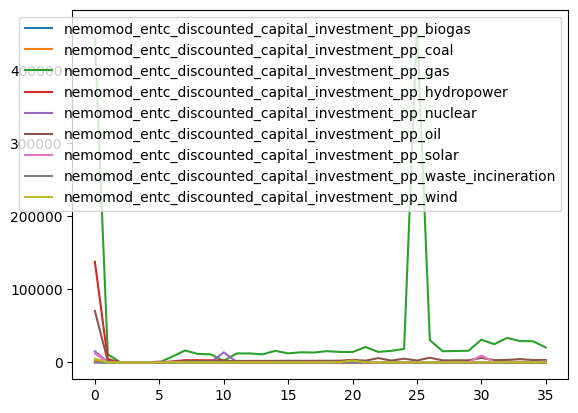

In [43]:
primary_id = 0

df_prim = df_out[
    df_out[
        ssp.key_primary
    ]
    .isin([primary_id])
]

df_in_cur = df_in[
    df_in[
        ssp.key_primary
    ]
    .isin([primary_id])
]


fields_plot = [
    x for x in df_prim.columns
    if "investment" in x
    and df_prim[x].max() > 0
]
(
    df_prim[fields_plot]
    .plot(
        legend = True,
    )
)




<Axes: >

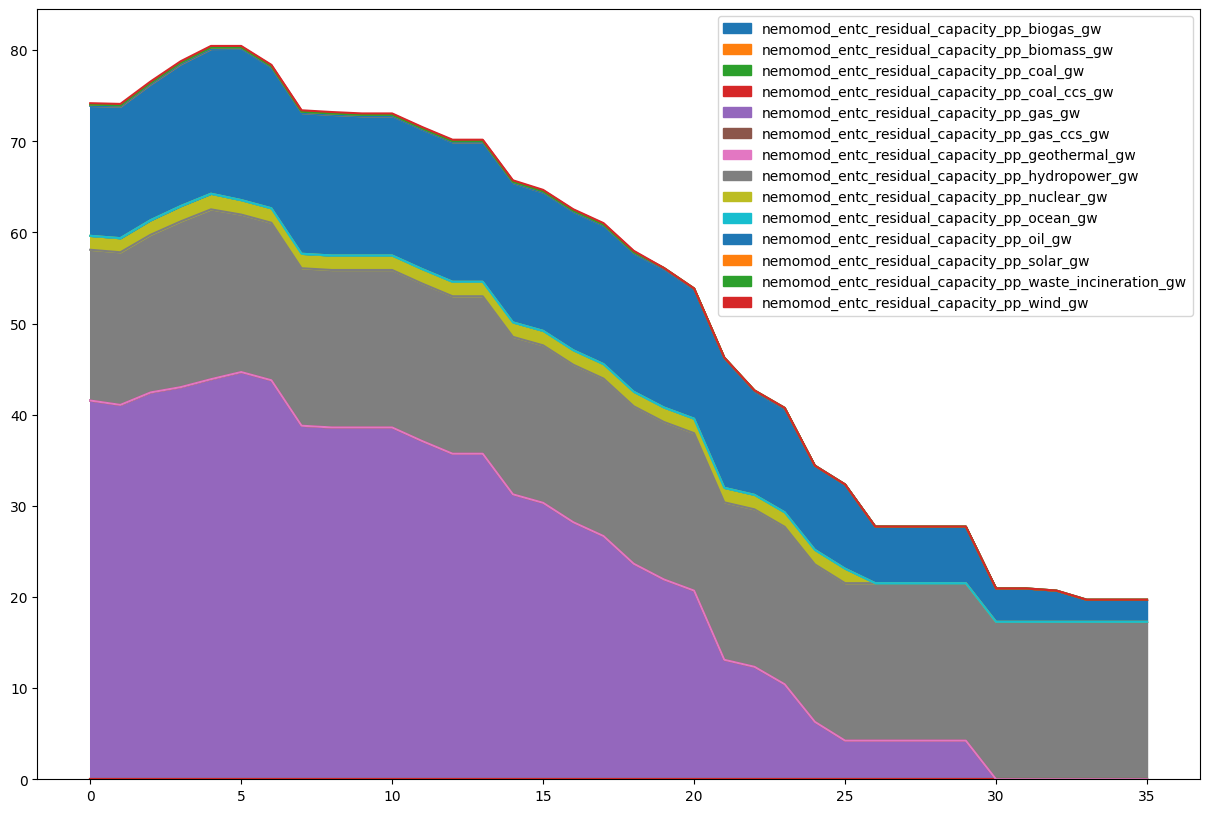

In [208]:


fig, ax = plt.subplots(figsize = (15, 10))
df_resid = matt.extract_model_variable(
    df_in_cur,
    "NemoMod ResidualCapacity"
)
(
    df_resid
    .plot
    .area(
        ax = ax
    )
)

In [336]:
df_resid

,nemomod_entc_residual_capacity_pp_biogas_gw,nemomod_entc_residual_capacity_pp_biomass_gw,nemomod_entc_residual_capacity_pp_coal_gw,nemomod_entc_residual_capacity_pp_coal_ccs_gw,nemomod_entc_residual_capacity_pp_gas_gw,nemomod_entc_residual_capacity_pp_gas_ccs_gw,nemomod_entc_residual_capacity_pp_geothermal_gw,nemomod_entc_residual_capacity_pp_hydropower_gw,nemomod_entc_residual_capacity_pp_nuclear_gw,nemomod_entc_residual_capacity_pp_ocean_gw,nemomod_entc_residual_capacity_pp_oil_gw,nemomod_entc_residual_capacity_pp_solar_gw,nemomod_entc_residual_capacity_pp_waste_incineration_gw,nemomod_entc_residual_capacity_pp_wind_gw
0,0.0,0.0,0.0,0.0,41.559860,0.0,0.0,16.542703,1.529961,0.0,14.260154,0.139226,0.0,0.152996
1,0.0,0.0,0.0,0.0,41.082501,0.0,0.0,16.744743,1.548647,0.0,14.434317,0.140927,0.0,0.154865
2,0.0,0.0,0.0,0.0,42.447927,0.0,0.0,17.301274,1.600118,0.0,14.914059,0.145611,0.0,0.160012
3,0.0,0.0,0.0,0.0,43.030449,0.0,0.0,18.188691,1.682191,0.0,15.571370,0.153079,0.0,0.168219
4,0.0,0.0,0.0,0.0,43.901919,0.0,0.0,18.634288,1.716260,0.0,15.886728,0.156180,0.0,0.171626
5,0.0,0.0,0.0,0.0,44.685942,0.0,0.0,17.277790,1.591323,0.0,16.608002,0.144810,0.0,0.159132
6,0.0,0.0,0.0,0.0,43.786845,0.0,0.0,17.277790,1.591323,0.0,15.436788,0.144810,0.0,0.159132
7,0.0,0.0,0.0,0.0,38.796456,0.0,0.0,17.277790,1.591323,0.0,15.436788,0.144810,0.0,0.159132
8,0.0,0.0,0.0,0.0,38.605497,0.0,0.0,17.277790,1.591323,0.0,15.436788,0.144810,0.0,0.159132
9,0.0,0.0,0.0,0.0,38.605497,0.0,0.0,17.277790,1.591323,0.0,15.282430,0.144810,0.0,0.159132


In [45]:
[x for x in df_out.columns if "capacity" in x]

['nemomod_entc_total_annual_generation_capacity_pp_biogas',
 'nemomod_entc_total_annual_generation_capacity_pp_biomass',
 'nemomod_entc_total_annual_generation_capacity_pp_coal',
 'nemomod_entc_total_annual_generation_capacity_pp_coal_ccs',
 'nemomod_entc_total_annual_generation_capacity_pp_gas',
 'nemomod_entc_total_annual_generation_capacity_pp_gas_ccs',
 'nemomod_entc_total_annual_generation_capacity_pp_geothermal',
 'nemomod_entc_total_annual_generation_capacity_pp_hydropower',
 'nemomod_entc_total_annual_generation_capacity_pp_nuclear',
 'nemomod_entc_total_annual_generation_capacity_pp_ocean',
 'nemomod_entc_total_annual_generation_capacity_pp_oil',
 'nemomod_entc_total_annual_generation_capacity_pp_solar',
 'nemomod_entc_total_annual_generation_capacity_pp_waste_incineration',
 'nemomod_entc_total_annual_generation_capacity_pp_wind',
 'nemomod_entc_total_annual_generation_capacity_st_batteries',
 'nemomod_entc_total_annual_generation_capacity_st_compressed_air',
 'nemomod_entc_t

In [46]:
ssp.model_attributes.configuration.dict_config


{'area_units': 'ha',
 'days_per_year': 365.25,
 'discount_rate': 0,
 'emissions_mass': 'MT',
 'energy_units': 'PJ',
 'energy_units_nemomod': 'PJ',
 'global_warming_potential': 100,
 'historical_back_proj_n_periods': 10,
 'historical_harvested_wood_products_method': 'back_project',
 'historical_solid_waste_method': 'back_project',
 'land_use_reallocation_max_out_directionality': 'decrease_only',
 'length_units': 'km',
 'monetary_units': 'mm_usd',
 'nemomod_solver': 'highs',
 'nemomod_solver_time_limit_seconds': 900,
 'nemomod_time_periods': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 'power_units': 'GW',
 'region': ['costa_rica'],
 'volume_units': 'm3',
 'num_lhc_samples': 1000,
 'output_method': 'sqlite',
 'random_seed': 6401745,
 'save_inputs': False,
 'time_period_u0': 5}

In [47]:
modvar = matt.get_variable("NemoMod Generation Capacity")
modvar.get_from_dataframe(df_prim).head()

,nemomod_entc_total_annual_generation_capacity_pp_biogas,nemomod_entc_total_annual_generation_capacity_pp_biomass,nemomod_entc_total_annual_generation_capacity_pp_coal,nemomod_entc_total_annual_generation_capacity_pp_coal_ccs,nemomod_entc_total_annual_generation_capacity_pp_gas,nemomod_entc_total_annual_generation_capacity_pp_gas_ccs,nemomod_entc_total_annual_generation_capacity_pp_geothermal,nemomod_entc_total_annual_generation_capacity_pp_hydropower,nemomod_entc_total_annual_generation_capacity_pp_nuclear,nemomod_entc_total_annual_generation_capacity_pp_ocean,nemomod_entc_total_annual_generation_capacity_pp_oil,nemomod_entc_total_annual_generation_capacity_pp_solar,nemomod_entc_total_annual_generation_capacity_pp_waste_incineration,nemomod_entc_total_annual_generation_capacity_pp_wind,nemomod_entc_total_annual_generation_capacity_st_batteries,nemomod_entc_total_annual_generation_capacity_st_compressed_air,nemomod_entc_total_annual_generation_capacity_st_flywheels,nemomod_entc_total_annual_generation_capacity_st_pumped_hydro
0,0.000000,0.0,1.038856,0.0,476.773604,0.0,0.0,42.581621,5.315262,0.0,72.847998,17.184417,0.000000,1.642748,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10
1,0.000000,0.0,1.068701,0.0,487.343129,0.0,0.0,43.666195,5.454035,0.0,74.688579,17.212680,0.000000,1.684590,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10
2,0.005914,0.0,1.068701,0.0,488.708554,0.0,0.0,44.222727,5.505506,0.0,75.168321,17.217364,0.000814,1.689737,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10
3,0.012365,0.0,1.068701,0.0,489.291076,0.0,0.0,45.110144,5.587579,0.0,75.825632,17.224833,0.001636,1.697944,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10
4,0.019270,0.0,1.068701,0.0,490.162546,0.0,0.0,45.555740,5.621648,0.0,76.140990,17.227933,0.002463,1.701351,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10


In [374]:
#[x for x in matt.all_variables if "Consumption" in x]
[x for x in matt.all_variables if "Production" in x]
modvar = matt.get_variable("NemoMod Production by Technology")


unit = matt.get_unit("energy")
(modvar.get_from_dataframe(df_prim).iloc[7].sum()*unit.convert("PJ", "mwh")/1000)/367669

4.446183735851677

In [ ]:
df_inputs

In [57]:
modvar = matt.get_variable("Total Energy Consumption from Industrial Energy")#Industrial Energy")
matt.extract_model_variable(
    df_prim,
    modvar
)

,energy_consumption_inen_total
0,1614.348152
1,1605.489146
2,1591.310577
3,1593.633404
4,1593.678415
5,1584.859258
6,1600.060008
7,1656.800166
8,1676.693044
9,1696.331352


In [81]:
ssp.analysis_id

In [74]:
dir(ssp.database.db)
#idb_strat = ssp.database.db.dict_iterative_database_tables.get("ATTRIBUTE_STRATEGY")
#idb_strat.read_table()
ssp.database.db.read_table("ATTRIBUTE_STRATEGY")

ssp.database.db.fp_base_output



'/opt/miniconda3/envs/amber_is_your_energy/lib/python3.11/site-packages/sisepuede/out/sisepuede_run_2024-11-04T09;23;26.721580/sisepuede_run_2024-11-04T09;23;26.721580_output_database'

In [69]:
idb_strat.read_table()

,strategy_id,strategy_code,strategy,description,transformation_specification,baseline_strategy_id
0,0,BASE,Strategy TX:BASE,NaN,TX:BASE,1
1,1000,AGRC:DEC_CH4_RICE,Singleton - Default Value - AGRC: Improve rice...,NaN,TX:AGRC:DEC_CH4_RICE,0
2,1001,AGRC:DEC_EXPORTS,Singleton - Default Value - AGRC: Decrease Exp...,NaN,TX:AGRC:DEC_EXPORTS,0
3,1002,AGRC:DEC_LOSSES_SUPPLY_CHAIN,Singleton - Default Value - AGRC: Reduce suppl...,NaN,TX:AGRC:DEC_LOSSES_SUPPLY_CHAIN,0
4,1003,AGRC:INC_CONSERVATION_AGRICULTURE,Singleton - Default Value - AGRC: Expand conse...,NaN,TX:AGRC:INC_CONSERVATION_AGRICULTURE,0
...,...,...,...,...,...,...
67,6001,PFLO:INC_IND_CCS,Singleton - Default Value - PFLO: Industrial c...,NaN,TX:PFLO:INC_IND_CCS,0
68,6002,PFLO:ALL,All Actions,All actions (unique by transformer),TX:AGRC:DEC_CH4_RICE|TX:AGRC:DEC_EXPORTS|TX:AG...,0
69,6003,PFLO:CONSTRAINED,Constrained Climate Action,NaN,TX:AGRC:DEC_CH4_RICE_LOW|TX:AGRC:DEC_LOSSES_SU...,0
70,6004,PFLO:TECHNOLOGICAL_ADOPTION,Technology Adoption Scenario,NaN,TX:AGRC:DEC_CH4_RICE_LOW|TX:AGRC:DEC_LOSSES_SU...,0
